# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency

# Set the style and display settings of the plots

In [5]:
sns.set_palette('viridis')

In [6]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# 1. Load the datasets

In [8]:
applicant_data = pd.read_csv('applicant_dataset.csv')
third_party_data = pd.read_csv('third_party_dataset.csv')
merged_data = pd.read_csv('synthetic_loan_applications.csv')

# 2. Initial Exploration

In [10]:
# Display basic information
print("="*80)
print("DATASET OVERVIEW")
print("="*80)

# Function to display dataset info
def display_dataset_info(df, name):
    print(f"\n{name} Dataset:")
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
    print("\nSample data:")
    display(df.head())
    print("\nData types:")
    display(df.dtypes)
    print("\nSummary statistics:")
    display(df.describe())
    print("\nMissing values:")
    missing = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df) * 100)
    missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
    display(missing_df[missing_df['Missing Values'] > 0])

# Display info for each dataset
display_dataset_info(applicant_data, "Applicant")
display_dataset_info(third_party_data, "Third-Party Credit")
display_dataset_info(merged_data, "Merged (Final)")

DATASET OVERVIEW

Applicant Dataset:
Shape: (5000, 9)
Memory usage: 0.34 MB

Sample data:


,applicant_id,annual_income,self_reported_debt,self_reported_expenses,requested_amount,age,province,employment_status,months_employed
0,A00001,76753.72,854.83,3126.56,10995.52,64,ON,Full-time,597
1,A00002,55874.75,642.50,1782.33,11147.93,79,ON,Full-time,324
2,A00003,82771.93,1325.33,8591.82,16747.36,59,ON,Unemployed,245
3,A00004,128221.55,1680.30,4035.23,12121.55,36,ON,Full-time,314
4,A00005,53259.07,663.49,3985.44,1041.35,34,ON,Full-time,161



Data types:


applicant_id               object
annual_income             float64
self_reported_debt        float64
self_reported_expenses    float64
requested_amount          float64
age                         int64
province                   object
employment_status          object
months_employed             int64
dtype: object


Summary statistics:


,annual_income,self_reported_debt,self_reported_expenses,requested_amount,age,months_employed
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,67665.38,1122.28,4989.14,15790.50,59.50,305.24
std,34312.26,677.03,2920.14,8320.66,23.72,172.11
min,20000.00,171.79,1.58,1007.32,19.00,0.00
25%,43090.05,641.49,2433.65,8806.17,39.00,159.00
50%,60278.62,967.82,4930.94,15913.27,59.00,308.00
75%,83533.69,1422.61,7592.46,22816.95,80.00,455.00
max,200000.00,4823.01,9999.25,29997.13,100.00,600.00



Missing values:


,Missing Values,Percentage



Third-Party Credit Dataset:
Shape: (5000, 7)
Memory usage: 0.27 MB

Sample data:


,applicant_id,credit_score,limit_factor,credit_utilization,num_open_accounts,num_credit_inquiries,payment_history
0,A00001,685,0.73,35.65,4,9,Late<30
1,A00002,682,1.63,65.56,2,2,On Time
2,A00003,548,1.40,27.14,16,7,On Time
3,A00004,758,0.63,25.93,18,1,On Time
4,A00005,724,1.07,48.21,3,7,On Time



Data types:


applicant_id             object
credit_score              int64
limit_factor            float64
credit_utilization      float64
num_open_accounts         int64
num_credit_inquiries      int64
payment_history          object
dtype: object


Summary statistics:


,credit_score,limit_factor,credit_utilization,num_open_accounts,num_credit_inquiries
count,5000.00,5000.00,5000.00,5000.00,5000.00
mean,678.96,1.24,33.26,10.05,5.08
std,97.61,0.43,17.66,6.06,3.16
min,327.00,0.50,0.36,0.00,0.00
25%,611.00,0.86,19.84,5.00,2.00
50%,677.00,1.24,31.30,10.00,5.00
75%,746.00,1.62,45.21,15.00,8.00
max,900.00,2.00,90.07,20.00,10.00



Missing values:


,Missing Values,Percentage



Merged (Final) Dataset:
Shape: (5000, 21)
Memory usage: 0.80 MB

Sample data:


,applicant_id,annual_income,self_reported_debt,self_reported_expenses,requested_amount,age,province,employment_status,months_employed,credit_score,credit_utilization,num_open_accounts,num_credit_inquiries,payment_history,total_credit_limit,monthly_expenses,estimated_debt,DTI,approved,approved_amount,interest_rate
0,A00001,76753.72,854.83,3126.56,10995.52,64,ON,Full-time,597,685,35.65,4,9,Late<30,56329.76,4323.28,602.39,25.36,0,0.00,0.00
1,A00002,55874.75,642.50,1782.33,11147.93,79,ON,Full-time,324,682,65.56,2,2,On Time,91093.95,118.01,1791.58,55.87,0,0.00,0.00
2,A00003,82771.93,1325.33,8591.82,16747.36,59,ON,Unemployed,245,548,27.14,16,7,On Time,115827.80,1327.09,943.21,36.53,0,0.00,0.00
3,A00004,128221.55,1680.30,4035.23,12121.55,36,ON,Full-time,314,758,25.93,18,1,On Time,80611.63,3281.80,627.10,23.30,1,12121.55,3.57
4,A00005,53259.07,663.49,3985.44,1041.35,34,ON,Full-time,161,724,48.21,3,7,On Time,56832.49,9368.44,822.03,33.82,1,1041.35,4.83



Data types:


applicant_id               object
annual_income             float64
self_reported_debt        float64
self_reported_expenses    float64
requested_amount          float64
age                         int64
province                   object
employment_status          object
months_employed             int64
credit_score                int64
credit_utilization        float64
num_open_accounts           int64
num_credit_inquiries        int64
payment_history            object
total_credit_limit        float64
monthly_expenses          float64
estimated_debt            float64
DTI                       float64
approved                    int64
approved_amount           float64
interest_rate             float64
dtype: object


Summary statistics:


,annual_income,self_reported_debt,self_reported_expenses,requested_amount,age,months_employed,credit_score,credit_utilization,num_open_accounts,num_credit_inquiries,total_credit_limit,monthly_expenses,estimated_debt,DTI,approved,approved_amount,interest_rate
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,67665.38,1122.28,4989.14,15790.50,59.50,305.24,678.96,33.26,10.05,5.08,84236.24,4974.85,837.24,40.08,0.50,5174.44,2.99
std,34312.26,677.03,2920.14,8320.66,23.72,172.11,97.61,17.66,6.06,3.16,54601.06,2880.57,748.25,12.03,0.50,6384.02,3.23
min,20000.00,171.79,1.58,1007.32,19.00,0.00,327.00,0.36,0.00,0.00,10134.07,4.88,3.07,13.53,0.00,0.00,0.00
25%,43090.05,641.49,2433.65,8806.17,39.00,159.00,611.00,19.84,5.00,2.00,45586.41,2450.17,330.16,31.51,0.00,0.00,0.00
50%,60278.62,967.82,4930.94,15913.27,59.00,308.00,677.00,31.30,10.00,5.00,71501.65,5008.78,623.43,38.80,0.00,0.00,0.00
75%,83533.69,1422.61,7592.46,22816.95,80.00,455.00,746.00,45.21,15.00,8.00,107136.19,7459.55,1093.77,47.20,1.00,10000.00,5.97
max,200000.00,4823.01,9999.25,29997.13,100.00,600.00,900.00,90.07,20.00,10.00,396595.21,9993.22,7067.69,87.15,1.00,25000.00,11.65



Missing values:


,Missing Values,Percentage


# 3. Univariate analysis

UNIVARIATE ANALYSIS


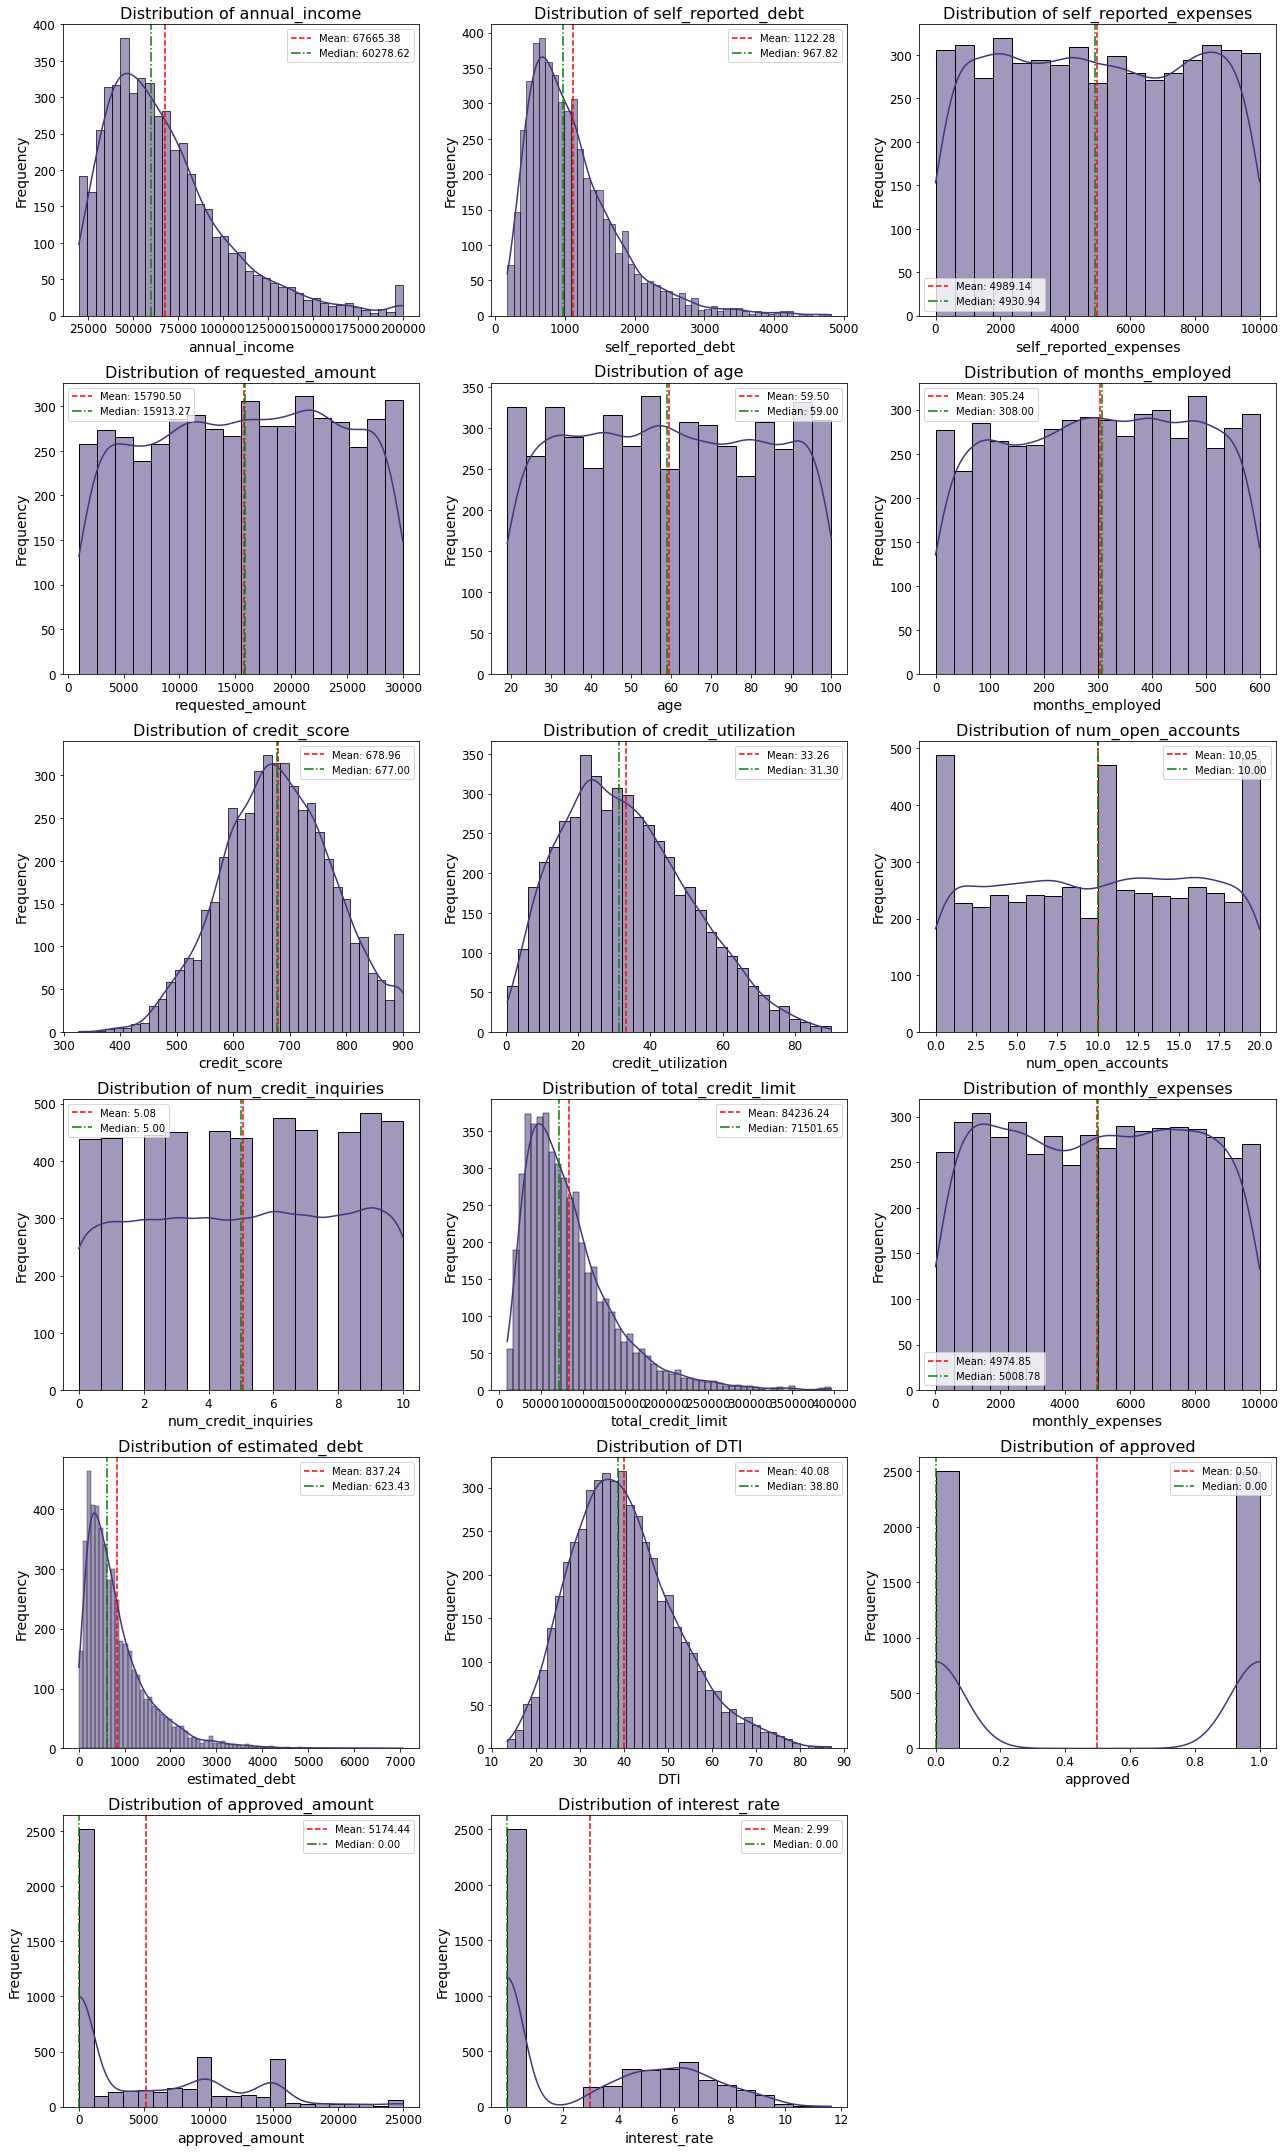

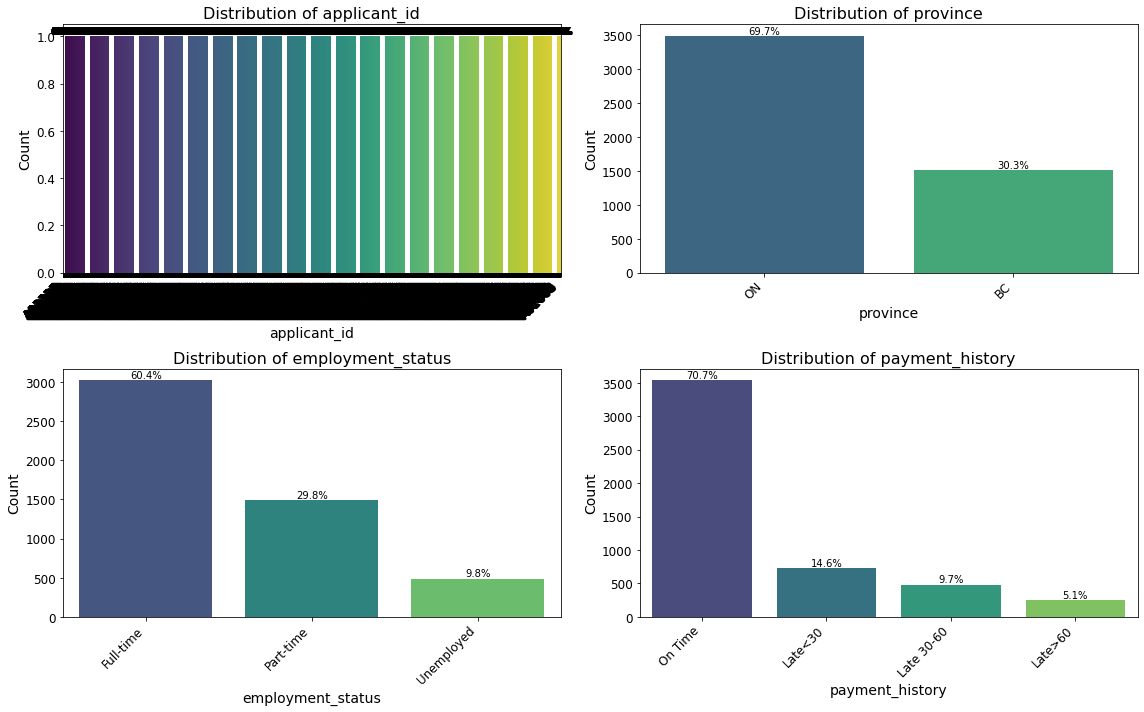

In [11]:
print("="*80)
print("UNIVARIATE ANALYSIS")
print("="*80)

# Create a function to plot histograms for numerical features
def plot_numerical_distributions(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(18, n_rows * 5))
    gs = gridspec.GridSpec(n_rows, n_cols)
    
    for i, column in enumerate(columns):
        ax = plt.subplot(gs[i])
        sns.histplot(df[column].dropna(), kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
        # Add mean and median lines
        if df[column].dtype in ['float64', 'int64']:
            mean = df[column].mean()
            median = df[column].median()
            ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
            ax.axvline(median, color='green', linestyle='-.', label=f'Median: {median:.2f}')
            ax.legend()
    
    plt.tight_layout()
    plt.show()

# Plot numerical distributions for merged data
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
plot_numerical_distributions(merged_data, numerical_columns)

# Plot categorical data distributions
def plot_categorical_distributions(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=['object', 'category']).columns
    
    n_cols = 2
    n_rows = (len(columns) + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(16, n_rows * 5))
    gs = gridspec.GridSpec(n_rows, n_cols)
    
    for i, column in enumerate(columns):
        ax = plt.subplot(gs[i])
        counts = df[column].value_counts()
        counts_percentage = 100 * counts / len(df)
        bars = sns.barplot(x=counts.index, y=counts.values, palette='viridis', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        
        # Add percentage labels
        for j, bar in enumerate(bars.patches):
            percentage = counts_percentage.values[j]
            bars.annotate(f'{percentage:.1f}%',
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='bottom', fontsize=10)
        
        # Rotate labels for better readability if needed
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# Plot categorical distributions for merged data
categorical_columns = merged_data.select_dtypes(include=['object']).columns
plot_categorical_distributions(merged_data, categorical_columns)

# 4. Analysis by Approval Status

ANALYSIS BY APPROVAL STATUS
Overall approval rate: 49.96%


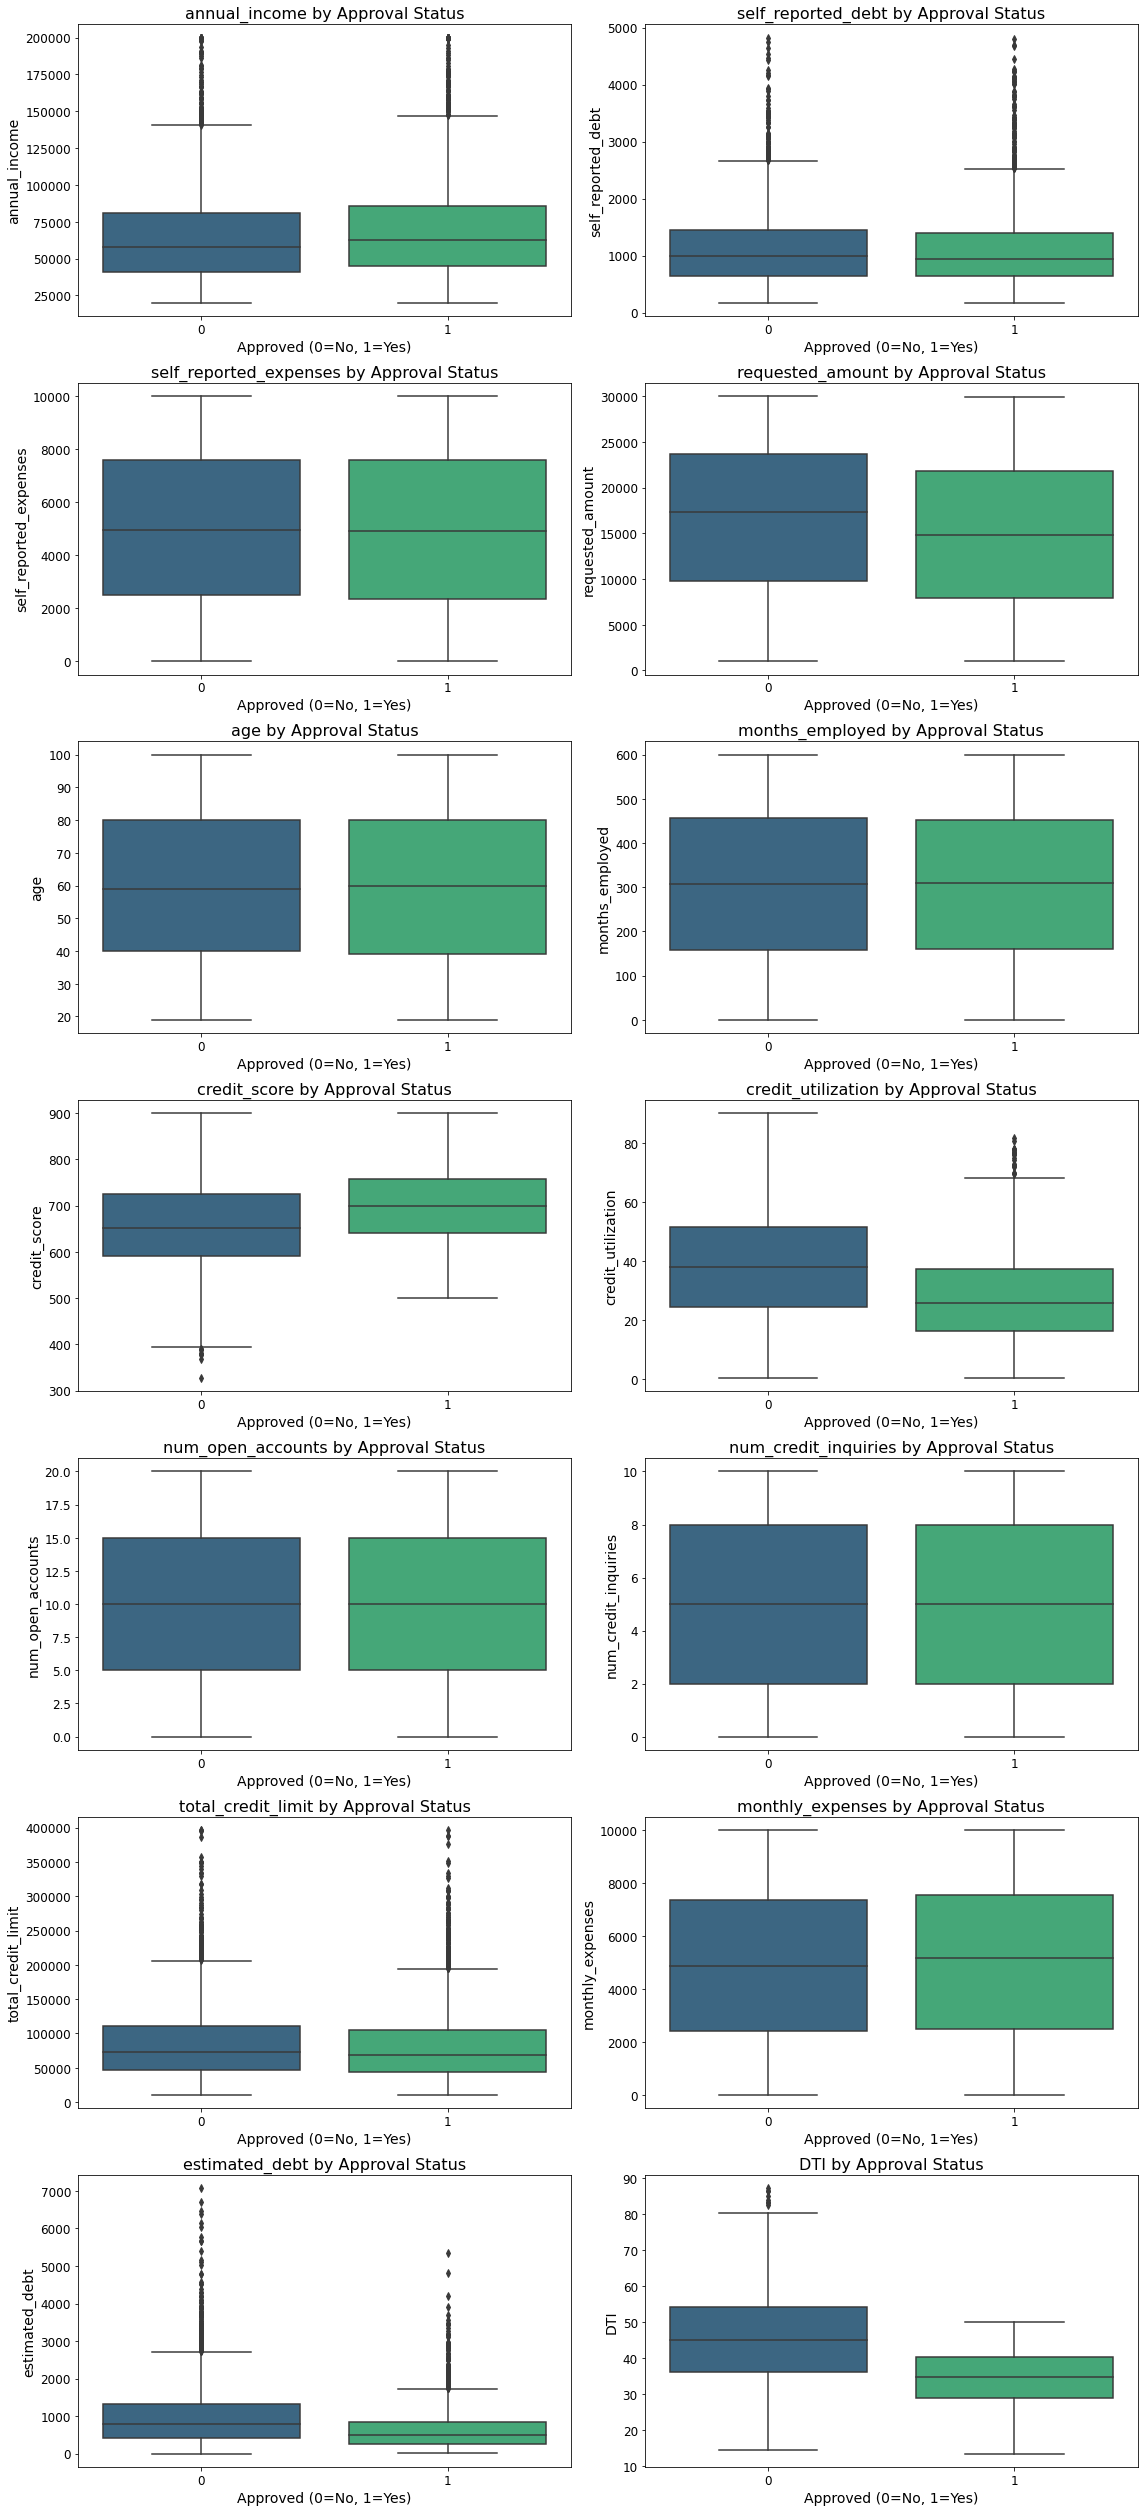


Statistical Significance (t-test for each variable by approval status):


,Variable,t-statistic,p-value,Significant at α=0.05
13,DTI,-35.85,0.00,Yes
7,credit_utilization,-22.61,0.00,Yes
12,estimated_debt,-16.90,0.00,Yes
6,credit_score,15.50,0.00,Yes
3,requested_amount,-6.91,0.00,Yes
0,annual_income,5.11,0.00,Yes
10,total_credit_limit,-2.61,0.01,Yes
11,monthly_expenses,1.65,0.10,No
1,self_reported_debt,-1.62,0.10,No
8,num_open_accounts,-1.30,0.19,No


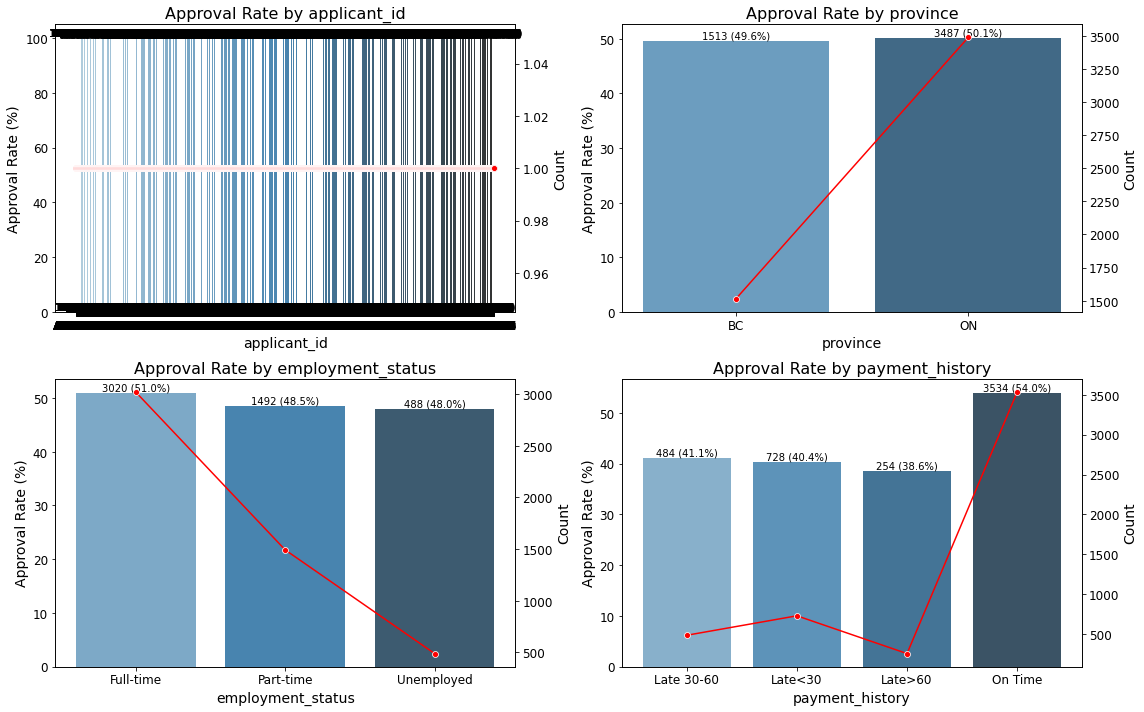


Chi-square Test Results for Categorical Variables:


,Variable,Chi-square,p-value,Significant at α=0.05
3,payment_history,77.63,0.00,Yes
2,employment_status,3.31,0.19,No
0,applicant_id,5000.00,0.49,No
1,province,0.11,0.74,No


In [12]:
print("="*80)
print("ANALYSIS BY APPROVAL STATUS")
print("="*80)

# Calculate approval rate
approval_rate = merged_data['approved'].mean() * 100
print(f"Overall approval rate: {approval_rate:.2f}%")

# function to compare numerical features by approval status
def compare_by_approval(df, numerical_cols=None):
    if numerical_cols is None:
        numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
        # Remove target variables
        if 'approved' in numerical_cols:
            numerical_cols.remove('approved')
        if 'approved_amount' in numerical_cols:
            numerical_cols.remove('approved_amount')
        if 'interest_rate' in numerical_cols:
            numerical_cols.remove('interest_rate')
    
    n_cols = 2
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(16, n_rows * 5))
    gs = gridspec.GridSpec(n_rows, n_cols)
    
    for i, column in enumerate(numerical_cols):
        ax = plt.subplot(gs[i])
        sns.boxplot(x='approved', y=column, data=df, ax=ax, palette='viridis')
        ax.set_title(f'{column} by Approval Status')
        ax.set_xlabel('Approved (0=No, 1=Yes)')
        ax.set_ylabel(column)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display statistical significance
    print("\nStatistical Significance (t-test for each variable by approval status):")
    result_df = pd.DataFrame(columns=['Variable', 't-statistic', 'p-value', 'Significant at α=0.05'])
    
    for col in numerical_cols:
        approved_values = df[df['approved'] == 1][col].dropna()
        denied_values = df[df['approved'] == 0][col].dropna()
        
        if len(approved_values) > 0 and len(denied_values) > 0:
            t_stat, p_val = stats.ttest_ind(approved_values, denied_values, equal_var=False)
            result_df = result_df.append({
                'Variable': col,
                't-statistic': t_stat,
                'p-value': p_val,
                'Significant at α=0.05': 'Yes' if p_val < 0.05 else 'No'
            }, ignore_index=True)
    
    result_df = result_df.sort_values('p-value')
    display(result_df)

# Compare numerical features by approval status
compare_by_approval(merged_data)

# Create function to analyze categorical features by approval status
def categorical_by_approval(df, categorical_cols=None):
    if categorical_cols is None:
        categorical_cols = df.select_dtypes(include=['object']).columns
    
    n_cols = 2
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(16, n_rows * 5))
    gs = gridspec.GridSpec(n_rows, n_cols)
    
    chi2_results = []
    
    for i, column in enumerate(categorical_cols):
        ax = plt.subplot(gs[i])
        
        # Calculate approval rate by category
        approval_by_cat = df.groupby(column)['approved'].mean() * 100
        counts = df.groupby(column).size()
        
        # Create DataFrame for plotting
        plot_df = pd.DataFrame({
            'Approval Rate (%)': approval_by_cat,
            'Count': counts
        }).reset_index()
        
        # Primary axis for approval rate
        bars = sns.barplot(x=column, y='Approval Rate (%)', data=plot_df, palette='Blues_d', ax=ax)
        ax.set_title(f'Approval Rate by {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Approval Rate (%)')
        
        # Add count text on bars
        for j, bar in enumerate(bars.patches):
            count = plot_df['Count'].iloc[j]
            pct = plot_df['Approval Rate (%)'].iloc[j]
            ax.annotate(f'{count} ({pct:.1f}%)',
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='bottom', fontsize=10)
        
        # Secondary axis for counts
        ax2 = ax.twinx()
        sns.lineplot(x=plot_df.index, y='Count', data=plot_df, marker='o', color='red', ax=ax2)
        ax2.set_ylabel('Count')
        
        # Chi-square test of independence
        contingency = pd.crosstab(df[column], df['approved'])
        chi2, p, dof, expected = chi2_contingency(contingency)
        chi2_results.append({
            'Variable': column,
            'Chi-square': chi2,
            'p-value': p,
            'Significant at α=0.05': 'Yes' if p < 0.05 else 'No'
        })
        
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Display chi-square results
    print("\nChi-square Test Results for Categorical Variables:")
    chi2_df = pd.DataFrame(chi2_results).sort_values('p-value')
    display(chi2_df)

# Analyze categorical features by approval status
categorical_by_approval(merged_data)

# 5. Bivariate Analysis

BIVARIATE ANALYSIS


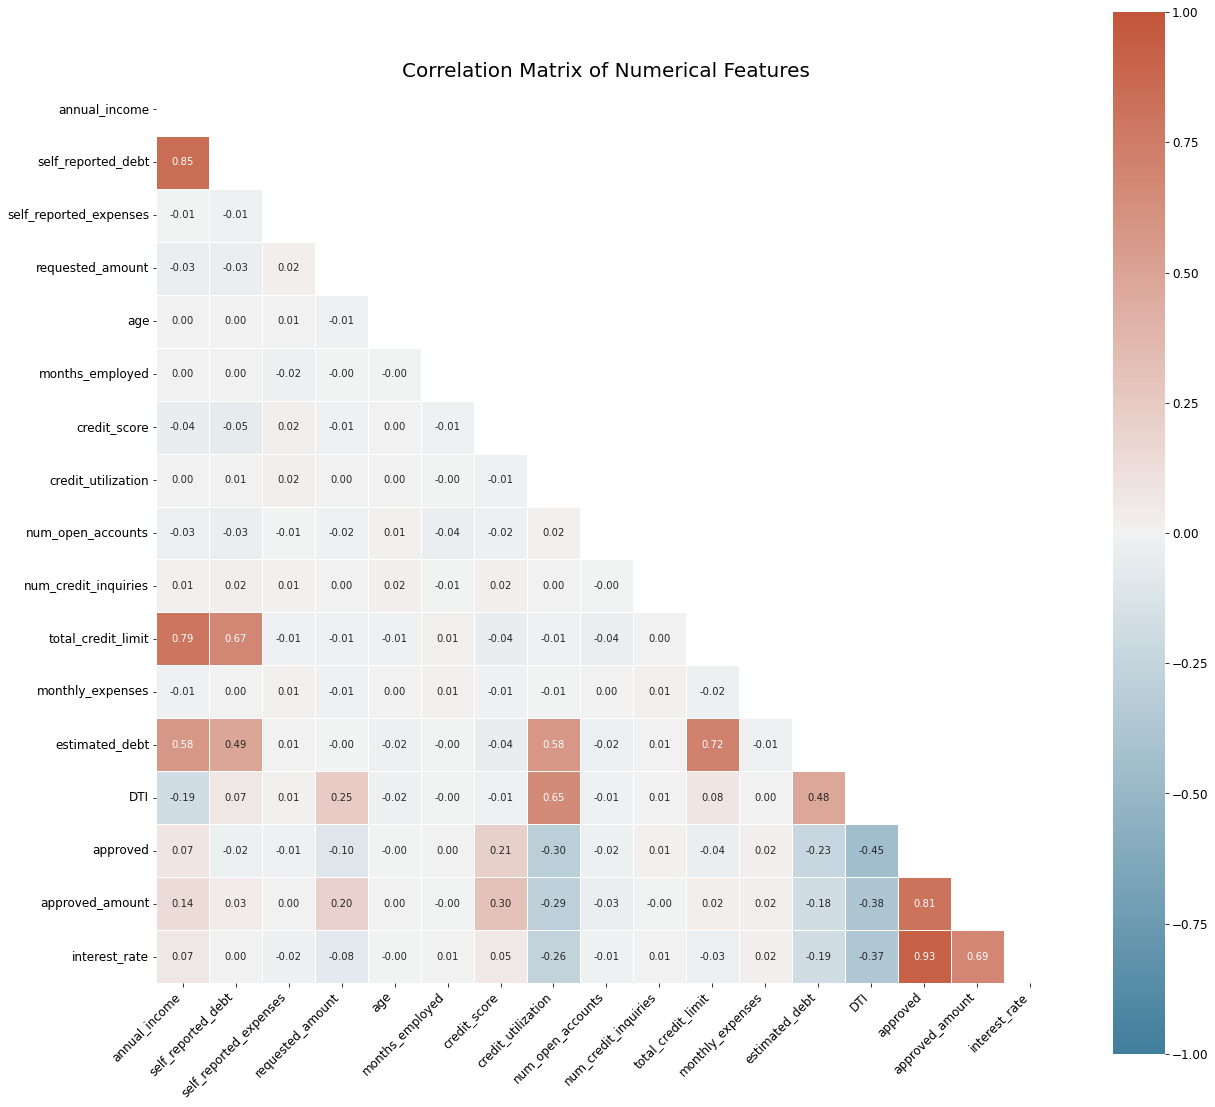


Top 10 highest correlated feature pairs:


,Feature 1,Feature 2,Correlation
0,approved,interest_rate,0.93
1,annual_income,self_reported_debt,0.85
2,approved,approved_amount,0.81
3,annual_income,total_credit_limit,0.79
4,total_credit_limit,estimated_debt,0.72
5,approved_amount,interest_rate,0.69
6,self_reported_debt,total_credit_limit,0.67
7,credit_utilization,DTI,0.65
8,credit_utilization,estimated_debt,0.58
9,annual_income,estimated_debt,0.58


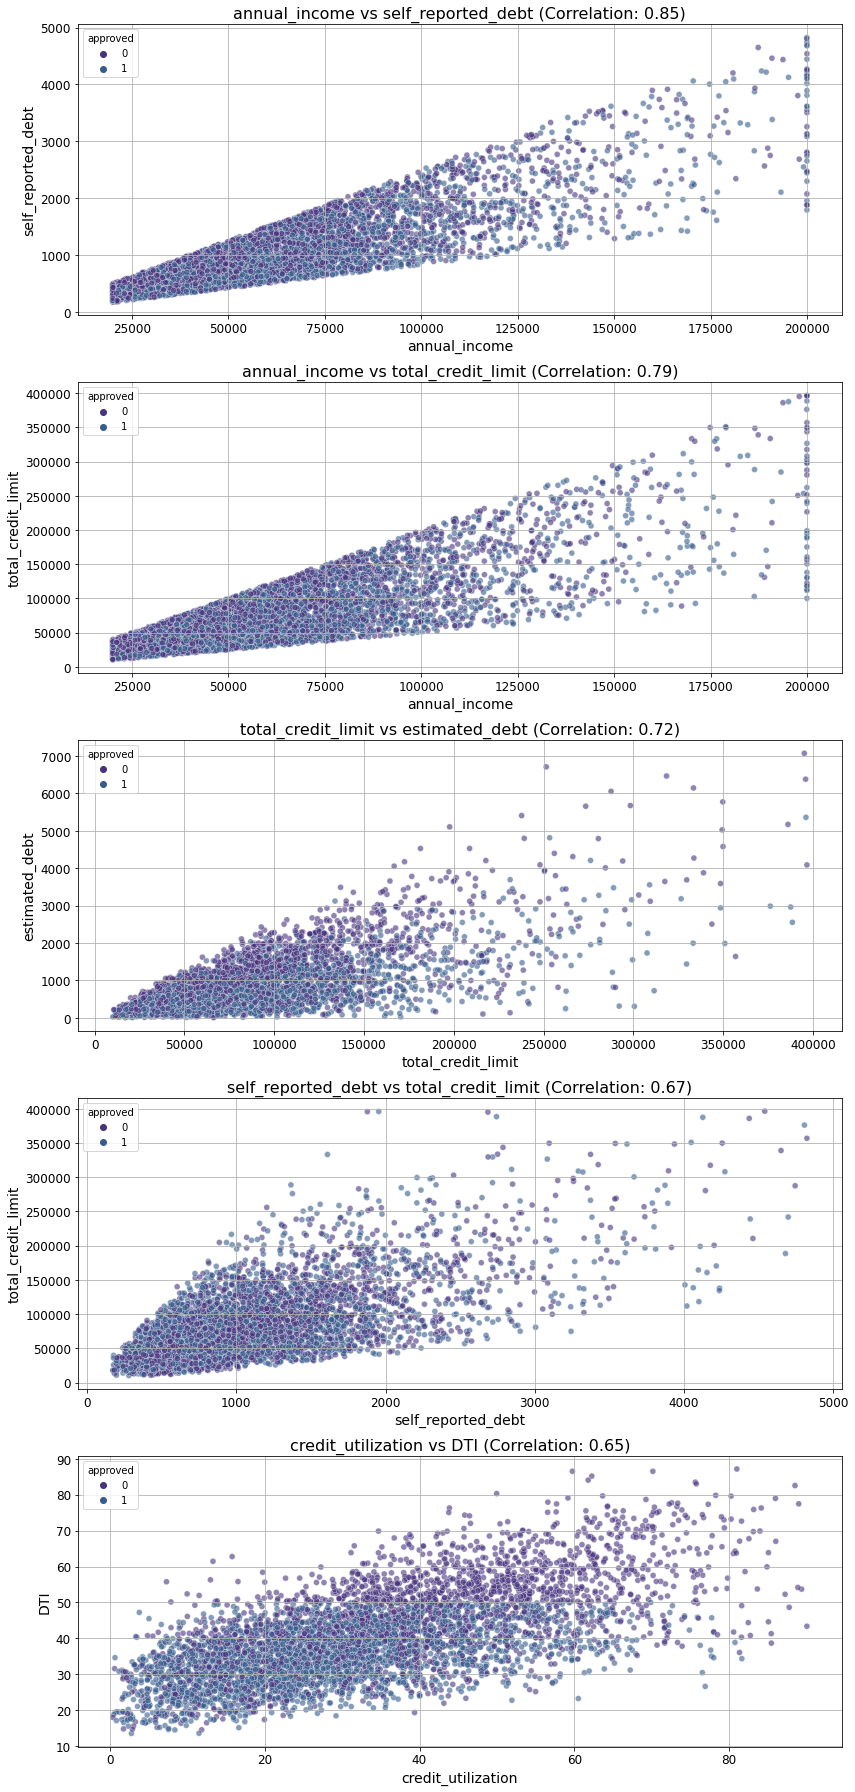

In [13]:
print("="*80)
print("BIVARIATE ANALYSIS")
print("="*80)

# Create correlation matrix
def plot_correlation_matrix(df, figsize=(18, 16)):
    # Get numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Calculate the correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Set up the matplotlib figure
    plt.figure(figsize=figsize)
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                annot=True, fmt=".2f", square=True, linewidths=.5)
    
    plt.title('Correlation Matrix of Numerical Features', fontsize=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Find the most correlated features
    print("\nTop 10 highest correlated feature pairs:")
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                              corr_matrix.iloc[i, j]))
    
    # Sort by absolute correlation value
    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Display top 10
    top_corr_df = pd.DataFrame(corr_pairs[:10], columns=['Feature 1', 'Feature 2', 'Correlation'])
    display(top_corr_df)

# Plot correlation matrix
plot_correlation_matrix(merged_data)

# Create scatter plots of highly correlated variables
def plot_pair_scatter(df, n_pairs=5):
    # Get numerical columns excluding target variables
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    for col in ['approved', 'approved_amount', 'interest_rate']:
        if col in numerical_cols:
            numerical_cols.remove(col)
    
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Find the most correlated feature pairs
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                              corr_matrix.iloc[i, j]))
    
    # Sort by absolute correlation value
    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Plot top n_pairs
    fig, axs = plt.subplots(n_pairs, 1, figsize=(12, 5*n_pairs))
    
    for i in range(n_pairs):
        if i < len(corr_pairs):
            feature1, feature2, corr_val = corr_pairs[i]
            
            # Create scatter plot with hue for approval status
            sns.scatterplot(x=feature1, y=feature2, hue='approved', data=df, alpha=0.6, ax=axs[i])
            
            axs[i].set_title(f'{feature1} vs {feature2} (Correlation: {corr_val:.2f})')
            axs[i].grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot scatter plots of highly correlated variables
plot_pair_scatter(merged_data)

# 6. Key Metrics Analysis

KEY METRICS ANALYSIS

DTI Ratio Analysis:


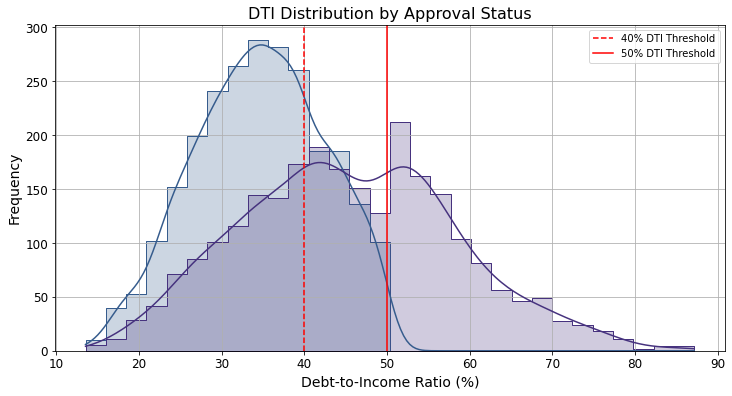

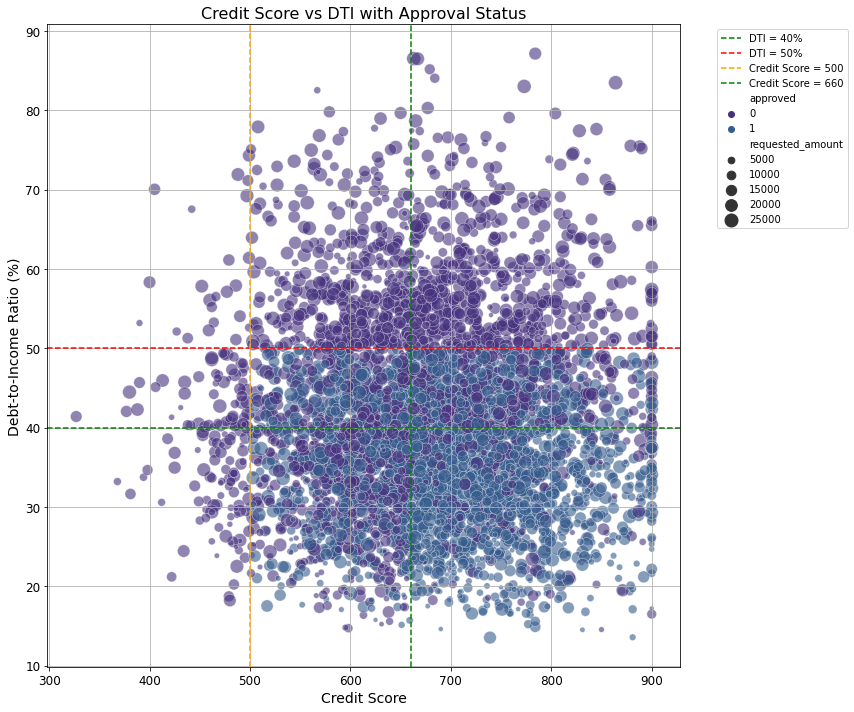

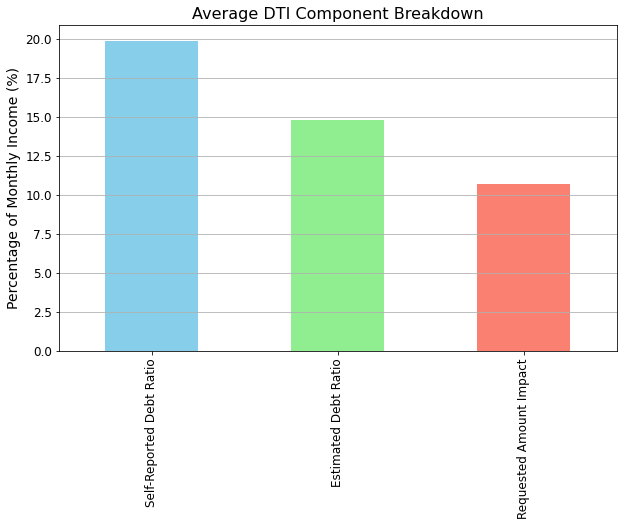

In [14]:
print("="*80)
print("KEY METRICS ANALYSIS")
print("="*80)

# Analyze DTI ratio and its components
print("\nDTI Ratio Analysis:")
merged_data['monthly_income'] = merged_data['annual_income'] / 12
merged_data['dti_calculated'] = ((merged_data['self_reported_debt'] + merged_data['estimated_debt'] + 
                               (merged_data['requested_amount'] * 0.03)) / merged_data['monthly_income']) * 100

# Plot DTI distribution by approval status
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='DTI', hue='approved', bins=30, kde=True, element='step')
plt.axvline(x=40, color='red', linestyle='--', label='40% DTI Threshold')
plt.axvline(x=50, color='red', linestyle='-', label='50% DTI Threshold')
plt.title('DTI Distribution by Approval Status')
plt.xlabel('Debt-to-Income Ratio (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Analysis of credit score and DTI interaction
plt.figure(figsize=(12, 10))
sns.scatterplot(data=merged_data, x='credit_score', y='DTI', hue='approved', size='requested_amount',
               sizes=(20, 200), alpha=0.6)

# Add approval condition boundaries
plt.axhline(y=40, color='green', linestyle='--', label='DTI = 40%')
plt.axhline(y=50, color='red', linestyle='--', label='DTI = 50%')
plt.axvline(x=500, color='orange', linestyle='--', label='Credit Score = 500')
plt.axvline(x=660, color='green', linestyle='--', label='Credit Score = 660')

plt.title('Credit Score vs DTI with Approval Status')
plt.xlabel('Credit Score')
plt.ylabel('Debt-to-Income Ratio (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# DTI Components Analysis
dti_components = pd.DataFrame({
    'Self-Reported Debt Ratio': (merged_data['self_reported_debt'] / merged_data['monthly_income']) * 100,
    'Estimated Debt Ratio': (merged_data['estimated_debt'] / merged_data['monthly_income']) * 100,
    'Requested Amount Impact': (merged_data['requested_amount'] * 0.03 / merged_data['monthly_income']) * 100
})

# Plot average DTI component breakdown
plt.figure(figsize=(10, 6))
dti_components.mean().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average DTI Component Breakdown')
plt.ylabel('Percentage of Monthly Income (%)')
plt.grid(axis='y')
plt.show()

# 7. Approved Loan Analysis

APPROVED LOAN ANALYSIS
Number of approved applications: 2498
Approval rate: 49.96%
Average approved amount: $10357.17
Average interest rate: 5.98%


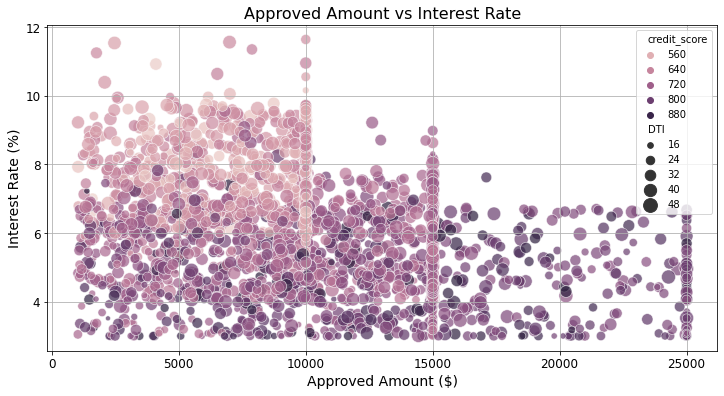

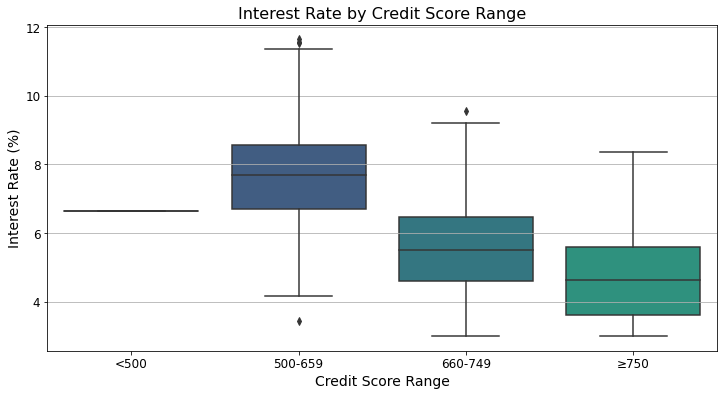

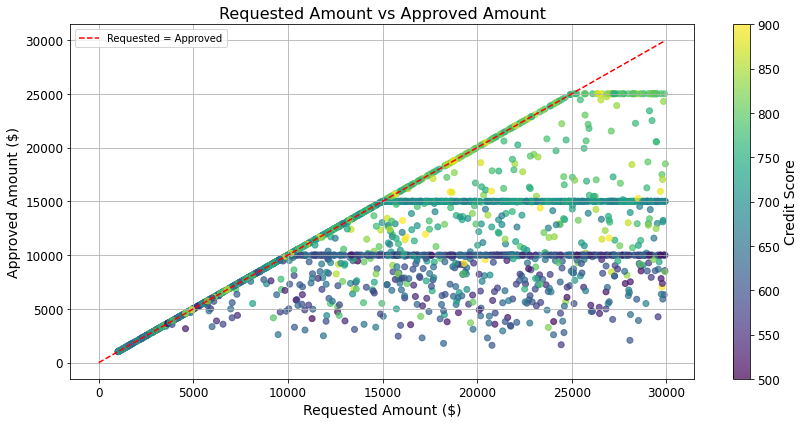

In [15]:
print("="*80)
print("APPROVED LOAN ANALYSIS")
print("="*80)

# Filter approved applications
approved_data = merged_data[merged_data['approved'] == 1]

# Display approval metrics
print(f"Number of approved applications: {len(approved_data)}")
print(f"Approval rate: {len(approved_data) / len(merged_data) * 100:.2f}%")
print(f"Average approved amount: ${approved_data['approved_amount'].mean():.2f}")
print(f"Average interest rate: {approved_data['interest_rate'].mean():.2f}%")

# Analyze relationship between approved amount and interest rate
plt.figure(figsize=(12, 6))
sns.scatterplot(data=approved_data, x='approved_amount', y='interest_rate', 
               hue='credit_score', size='DTI', sizes=(20, 200), alpha=0.7)
plt.title('Approved Amount vs Interest Rate')
plt.xlabel('Approved Amount ($)')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.show()

# Credit score impact on interest rate
plt.figure(figsize=(12, 6))
sns.boxplot(data=approved_data, x=pd.cut(approved_data['credit_score'], 
                                       bins=[300, 500, 660, 750, 900],
                                       labels=['<500', '500-659', '660-749', '≥750']), 
          y='interest_rate')
plt.title('Interest Rate by Credit Score Range')
plt.xlabel('Credit Score Range')
plt.ylabel('Interest Rate (%)')
plt.grid(axis='y')
plt.show()

# Analyze requested vs approved amounts
plt.figure(figsize=(12, 6))
plt.scatter(approved_data['requested_amount'], approved_data['approved_amount'], 
           c=approved_data['credit_score'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Credit Score')
plt.plot([0, approved_data['requested_amount'].max()], [0, approved_data['requested_amount'].max()], 
         'r--', label='Requested = Approved')
plt.title('Requested Amount vs Approved Amount')
plt.xlabel('Requested Amount ($)')
plt.ylabel('Approved Amount ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Feature importance

FEATURE IMPORTANCE (Based on Statistical Analysis)


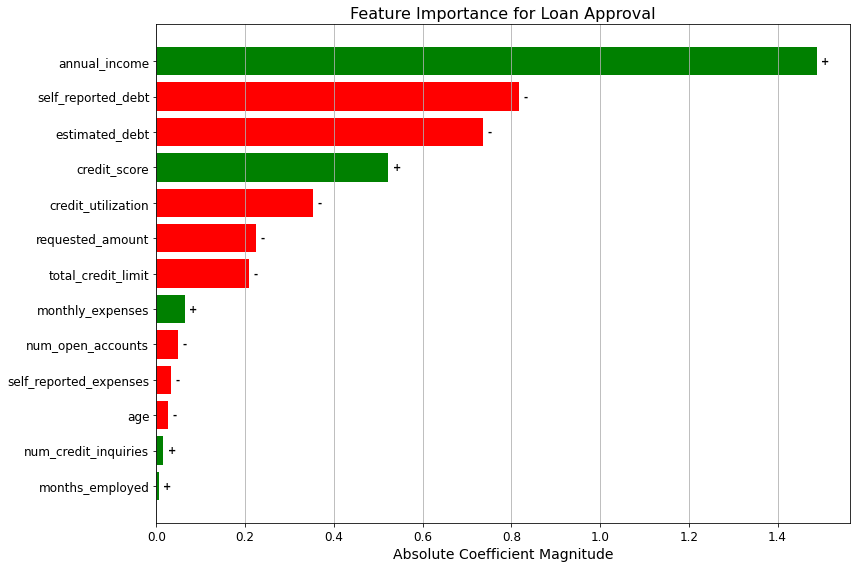

In [16]:
print("="*80)
print("FEATURE IMPORTANCE (Based on Statistical Analysis)")
print("="*80)

# Calculate feature importance using logistic regression coefficients
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Prepare data
numeric_features = merged_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Remove target variables and calculated variables
for col in ['approved', 'approved_amount', 'interest_rate', 'DTI', 'monthly_income', 'dti_calculated']:
    if col in numeric_features:
        numeric_features.remove(col)

X = merged_data[numeric_features].fillna(merged_data[numeric_features].median())
y = merged_data['approved']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': numeric_features,
    'Importance': np.abs(log_reg.coef_[0]),
    'Direction': np.sign(log_reg.coef_[0])
})

# Sort by absolute importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
              color=feature_importance['Direction'].map({1: 'green', -1: 'red'}))
plt.title('Feature Importance for Loan Approval')
plt.xlabel('Absolute Coefficient Magnitude')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top

# Add +/- signs to indicate direction of influence
for i, (imp, direction) in enumerate(zip(feature_importance['Importance'], feature_importance['Direction'])):
    plt.text(imp + 0.01, i, '+' if direction > 0 else '-', va='center', fontweight='bold')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

# 9. Dimensionality Reduction Visualization

PCA VISUALIZATION OF DATA


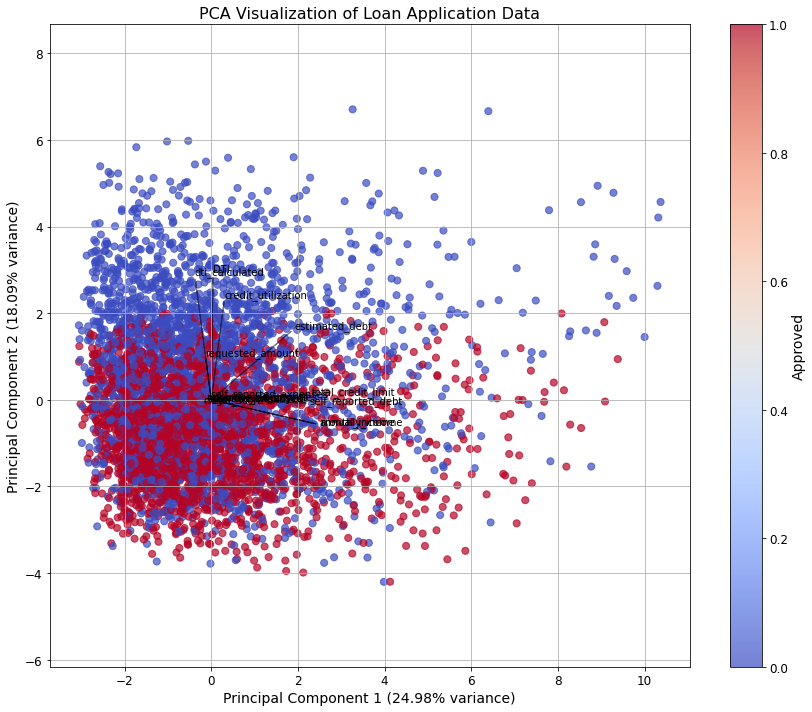

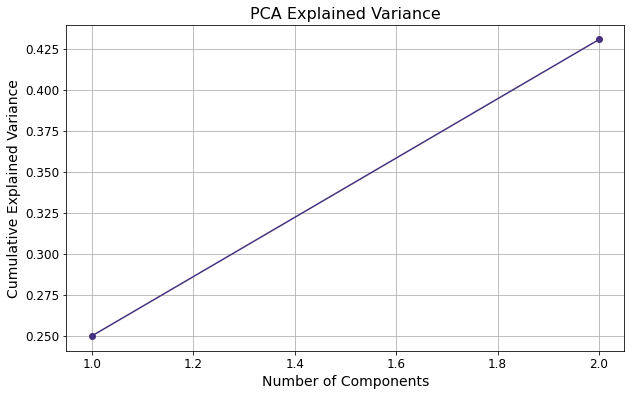

In [17]:
print("="*80)
print("PCA VISUALIZATION OF DATA")
print("="*80)

# Prepare data for PCA
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Remove target columns
for col in ['approved', 'approved_amount', 'interest_rate']:
    if col in numeric_cols:
        numeric_cols.remove(col)

X = merged_data[numeric_cols].fillna(merged_data[numeric_cols].median())

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA visualization
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=merged_data['approved'], 
                    cmap='coolwarm', alpha=0.7, s=50)
plt.colorbar(scatter, label='Approved')
plt.title('PCA Visualization of Loan Application Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True)

# Add feature vectors
feature_vectors = pca.components_.T
for i, (x, y) in enumerate(feature_vectors):
    plt.arrow(0, 0, x*5, y*5, color='k', alpha=0.5, width=0.001)
    plt.text(x*5.2, y*5.2, numeric_cols[i], color='k', fontsize=10)

plt.axis('equal')
plt.tight_layout()
plt.show()

# Show PCA explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
        np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# 10. Data Quality Assessment

In [18]:
print("="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

# Check for outliers using z-score
def detect_outliers(df, columns=None, z_threshold=3):
    if columns is None:
        columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    outlier_counts = {}
    for column in columns:
        # Calculate z-scores
        z_scores = np.abs(stats.zscore(df[column].dropna()))
        # Count values beyond threshold
        outliers = np.sum(z_scores > z_threshold)
        if outliers > 0:
            outlier_counts[column] = {
                'count': outliers,
                'percentage': (outliers / len(df[column].dropna())) * 100
            }
    
    return outlier_counts

# Detect outliers
outliers = detect_outliers(merged_data)

# Display outlier summary
print("\nOutlier Detection Summary (|z-score| > 3):")
outlier_df = pd.DataFrame.from_dict({k: [v['count'], v['percentage']] for k, v in outliers.items()},
                                  orient='index', columns=['Count', 'Percentage (%)'])
outlier_df = outlier_df.sort_values('Count', ascending=False)
display(outlier_df)

# Check distribution of numerical features
def check_distribution_skew(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    skew_data = []
    
    for col in numeric_cols:
        skew_val = df[col].skew()
        if abs(skew_val) > 0.5:  # Moderately skewed threshold
            skew_data.append({
                'Column': col,
                'Skewness': skew_val,
                'Distribution': 'Right-skewed' if skew_val > 0 else 'Left-skewed',
                'Severity': 'High' if abs(skew_val) > 1 else 'Moderate'
            })
    
    return pd.DataFrame(skew_data).sort_values('Skewness', key=abs, ascending=False)

# Check skewness
skew_df = check_distribution_skew(merged_data)
print("\nSkewness Analysis:")
display(skew_df)

# Check for multicollinearity
def check_multicollinearity(df, threshold=0.7):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    corr_matrix = df[numeric_cols].corr().abs()
    
    # Find features with correlation greater than threshold
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                high_corr_pairs.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    return pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)

# Check multicollinearity
multicollinearity_df = check_multicollinearity(merged_data)
print("\nMulticollinearity Analysis (|correlation| > 0.7):")
display(multicollinearity_df)

DATA QUALITY ASSESSMENT

Outlier Detection Summary (|z-score| > 3):


,Count,Percentage (%)
estimated_debt,93,1.86
total_credit_limit,89,1.78
self_reported_debt,88,1.76
annual_income,82,1.64
monthly_income,82,1.64
approved_amount,55,1.10
dti_calculated,33,0.66
DTI,28,0.56
credit_utilization,7,0.14
credit_score,5,0.10



Skewness Analysis:


,Column,Skewness,Distribution,Severity
3,estimated_debt,2.28,Right-skewed,High
2,total_credit_limit,1.69,Right-skewed,High
1,self_reported_debt,1.60,Right-skewed,High
6,monthly_income,1.29,Right-skewed,High
0,annual_income,1.29,Right-skewed,High
5,approved_amount,0.97,Right-skewed,Moderate
7,dti_calculated,0.66,Right-skewed,Moderate
4,DTI,0.61,Right-skewed,Moderate



Multicollinearity Analysis (|correlation| > 0.7):


,Feature 1,Feature 2,Correlation
2,annual_income,monthly_income,1.00
6,DTI,dti_calculated,0.96
8,approved,interest_rate,0.93
0,annual_income,self_reported_debt,0.85
3,self_reported_debt,monthly_income,0.85
7,approved,approved_amount,0.81
1,annual_income,total_credit_limit,0.79
5,total_credit_limit,monthly_income,0.79
4,total_credit_limit,estimated_debt,0.72


# 11. Business Metrics


--- 11.1 Approval Rate and Portfolio Metrics ---
Overall Approval Rate: 49.96%
Total Approved Credit Amount: $25,872,205.91
Average Approved Credit Amount: $10,357.17
Average Interest Rate: 5.98%


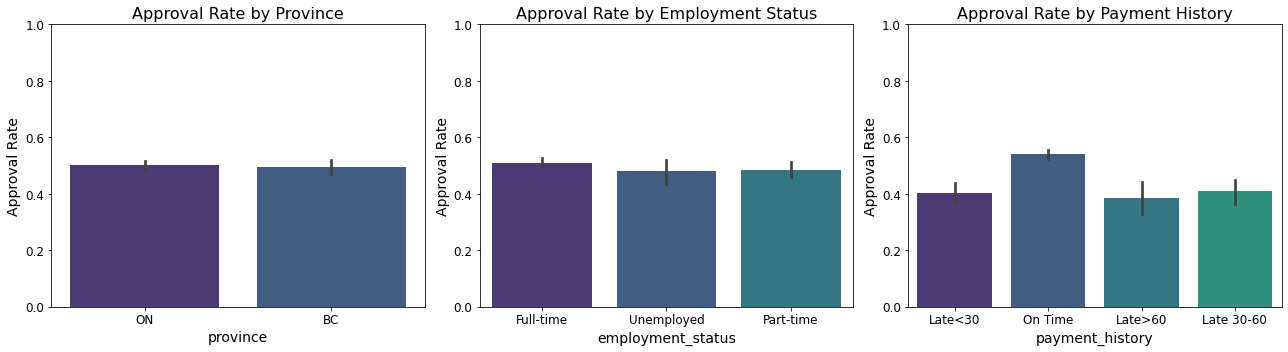

In [21]:
print("\n--- 11.1 Approval Rate and Portfolio Metrics ---")

# Calculate overall approval rate
approval_rate = merged_data['approved'].mean() * 100
print(f"Overall Approval Rate: {approval_rate:.2f}%")

# Calculate approval amounts and interest rates for approved loans
approved_merged_data = merged_data[merged_data['approved'] == 1]
total_approved_amount = approved_merged_data['approved_amount'].sum()
average_approved_amount = approved_merged_data['approved_amount'].mean()
average_interest_rate = approved_merged_data['interest_rate'].mean()

print(f"Total Approved Credit Amount: ${total_approved_amount:,.2f}")
print(f"Average Approved Credit Amount: ${average_approved_amount:,.2f}")
print(f"Average Interest Rate: {average_interest_rate:.2f}%")

# Approval rate by key demographics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Approval rate by province
sns.barplot(x='province', y='approved', data=merged_data, ax=axes[0])
axes[0].set_title('Approval Rate by Province')
axes[0].set_ylabel('Approval Rate')
axes[0].set_ylim(0, 1)

# Approval rate by employment status
sns.barplot(x='employment_status', y='approved', data=merged_data, ax=axes[1])
axes[1].set_title('Approval Rate by Employment Status')
axes[1].set_ylabel('Approval Rate')
axes[1].set_ylim(0, 1)

# Approval rate by payment history
sns.barplot(x='payment_history', y='approved', data=merged_data, ax=axes[2])
axes[2].set_title('Approval Rate by Payment History')
axes[2].set_ylabel('Approval Rate')
axes[2].set_ylim(0, 1)
plt.tight_layout()
plt.show()